## 导入相关包

In [21]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# 一、基础

## 1、张量  
简单讲，张量就是对标量矢量以及更高维度变量的统称，是用一种统一的方式来处理多线性映射。  
一维数组称为矢量，二维方阵称为二阶张量，3维方阵称为三阶张量

### 1.1创建张量

***补充  
tensorflow中以数据流图为基础，所以在进行操作时要首先创建图的session，具体后面会讲  
并且一般是使用上下文管理器--with,防忘记关闭session，浪费资源***

#### 1.1.1 创建制定维度的零向量

In [22]:
with tf.Session() as sess:
    zero_tensor = tf.zeros((2,3))
    print(sess.run(zero_tensor))    # sess.run() -- 在图中执行某个操作：获取变量的值，进行某个运算，更改变量的值，

[[0. 0. 0.]
 [0. 0. 0.]]


#### 1.1.2 创建指定维度的全1张量

In [23]:
with tf.Session() as sess:
    ones_tsr = tf.ones([2,3])
    print(ones_tsr.eval())         # 获取某个数据的值，可以直接用sess.run()，也可以用这种方法，XX.eval()   

[[1. 1. 1.]
 [1. 1. 1.]]


#### 1.1.3 创建使用指定数字填充指定纬度的张量

In [24]:
with tf.Session() as sess:
    fill_tsr = tf.fill((3,4),6)     # 这里指定纬度，使用[]和（）都可以   
    print(sess.run(fill_tsr))

[[6 6 6 6]
 [6 6 6 6]
 [6 6 6 6]]


#### 1.1.4 使用已经存在常数张量创建张量

In [25]:
with tf.Session() as sess:
    constant_tsr = tf.constant([[2,3],[5,6],[6,7]])
    print(constant_tsr.eval())

[[2 3]
 [5 6]
 [6 7]]


#### 1.1.5 创建相同纬度张量

In [26]:
with tf.Session() as sess:
    zeros_tsr = tf.zeros_like(constant_tsr)     # 创建一个全0 的与contant_tsr相同维度的张量
    ones_tsr = tf.ones_like(constant_tsr)       # 创建一个全1 的与contant_tsr相同维度的张量
    print(sess.run(zeros_tsr))
    print(sess.run(ones_tsr))

[[0 0]
 [0 0]
 [0 0]]
[[1 1]
 [1 1]
 [1 1]]


#### 1.1.6 创建指定数据间隔的张量  
 - linspace()包含两个端点 且端点值只支持浮点型，range()不含右端点

In [27]:
with tf.Session() as sess:
    linear_tsr = tf.linspace(start=0.,stop=1.,num = 3,name= 'linear_tsr')     #在tensorflow中创建变量，张量，占位等等
    print(sess.run(linear_tsr))                                               #最好赋上name属性，在后期查看数据流图有大用
    integer_seq_tsr = tf.range(start = 6,limit=15,delta = 3,name='integer_seq_tsr')    
    print(sess.run(integer_seq_tsr))

[0.  0.5 1. ]
[ 6  9 12]


#### 1.1.7 创建随机数字填充的张量

In [28]:
with tf.Session() as sess:
    #用random_uniform()生成均匀分布随机数
    randunif_tsr = tf.random_uniform([3,3],minval = 1,maxval = 4 ,name='randunif_tsr')
     #用random_normal()生成正太分布随机数 mean:平均值，stddev:标准差
    randnorm_tsr = tf.random_normal([3,3],mean = 0.0,stddev=1.0,name='randnorm_tsr')
       #truncated_normal()生成指定边界的正态分布的随机数  边界：期望到两个标准差之间的区间
    runcnorm_tsr = tf.truncated_normal([3,3],mean=0.0,stddev=1.0,name='runcnorm_tsr')
    print('random_uniform : \n',randunif_tsr.eval())
    print('random_normal :\n',randnorm_tsr.eval())
    print('truncated_normal : \n',runcnorm_tsr.eval())

random_uniform : 
 [[1.630053  1.644027  1.0098888]
 [1.750574  2.853107  2.0632257]
 [2.6275437 2.1357298 2.2104924]]
random_normal :
 [[-0.66626203 -0.80926716  2.23449   ]
 [ 0.15332676 -0.21148936 -0.2898067 ]
 [ 2.1210577  -0.4612942   0.07566451]]
truncated_normal : 
 [[ 1.3885586   0.36248916  0.56881547]
 [-1.0164601  -1.7508122  -0.09763764]
 [ 0.9004249   0.0537806  -0.5208297 ]]


#### 1.1.8 获得一个失序的张量  
 - 仅仅是对最低纬度的顺序进行乱序重排，例如一个一维，则是对里面元素的重排，如果是二维，则是对行元素的重排

In [29]:
with tf.Session() as sess:
    demo1_tsr = tf.constant([1,2,3,4,5])
    demo_tsr = tf.constant([[2,3,4,9],[5,6,7,8],[11,12,13,14]])       # 生成一个测试张量
    print(sess.run(demo_tsr))
    shuffled_output = tf.random_shuffle(demo_tsr)                     # 失序
    shuffled1_output = tf.random_shuffle(demo1_tsr)
    print('多维原始：\n',sess.run(demo_tsr))
    print('多维打乱：\n',sess.run(shuffled_output))
    print('一维原始：',sess.run(demo1_tsr))
    print('一维打乱：',sess.run(shuffled1_output))

[[ 2  3  4  9]
 [ 5  6  7  8]
 [11 12 13 14]]
多维原始：
 [[ 2  3  4  9]
 [ 5  6  7  8]
 [11 12 13 14]]
多维打乱：
 [[ 2  3  4  9]
 [11 12 13 14]
 [ 5  6  7  8]]
一维原始： [1 2 3 4 5]
一维打乱： [2 1 4 5 3]


#### 1.1.9 随机裁剪指定纬度的元素

In [30]:
with tf.Session() as sess:
    demo_tsr = tf.constant(np.arange(12).reshape([3,4]))         # 生成一个测试张量
    croped_output = tf.random_crop(demo_tsr,[2,2])              # 裁剪
    print(sess.run(demo_tsr))
    print(sess.run(croped_output))

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[[ 5  6]
 [ 9 10]]


### 1.2 转化为张量

#### 1.2.1 numpy数组转化为张量  
- 除了可以在创建张量时用numpy数组直接赋值，还可以使用convert_to_tensor,将numpy数组转化为张量  
- 列表也是可以转化的

In [31]:
with tf.Session() as sess:
    arr_np = np.arange(12).reshape((3,4))            #  创建一个numpy数组
    print(type(arr_np))
    arr_tsr = tf.convert_to_tensor(arr_np)
    print(type(arr_tsr))

<class 'numpy.ndarray'>
<class 'tensorflow.python.framework.ops.Tensor'>


## 2、tensorflow 基本概念

### 2.1 变量 (Variable)
- 创建Variable，需将一个tensor传递给Variable()构造函数
- 需要指定tensor的shape，最好为name 属性赋上值

In [32]:
with tf.Session() as sess:
    demo_variable = tf.Variable(tf.zeros([3,3]),name='demo')
    #sess.run(demo_variable.initializer)      # 初始化变量，这是初始化这一个变量，
    sess.run(tf.global_variables_initializer())    #还可以一次性初始化全部变量
    print(sess.run(demo_variable))

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


- 变量赋值  
tensorflow中使用assign为变量赋值
       

In [33]:
with tf.Session() as sess:
    demo_variable = tf.Variable(tf.random_normal(shape=[]),dtype=tf.float32,name = 'demo_variable')  # 创建一个变量，随机为其赋值
    sess.run(tf.global_variables_initializer())   #初始化变量
    print(sess.run(demo_variable))
    demo_variable = demo_variable.assign(4)    # 为变量赋值
    print(demo_variable.eval())
    sess.run(demo_variable)
    print(demo_variable.eval())

0.51038164
4.0
4.0


### 2.2 占位 （paceholder）  
- 数据的入口  
- 需要指定数据类型和数据的结构
- session运行中为其提供数据，数据通过这里进入模型

In [34]:
with tf.Session() as sess:
  
    demo_place = tf.placeholder(shape=[2,2],dtype=tf.float32,name='demo_place') # 这里需要指定shape和数据类型和name
    y = tf.identity(demo_place)  #y = x
    x_vals = np.random.rand(2,2)
    print(sess.run(y,feed_dict={demo_place:x_vals}))

[[0.6439089  0.5159655 ]
 [0.8216384  0.25590426]]


### 2.3 图 （graph）  
- tensorflow是基于数据流图的，tensorflow程序通常被组织成一个图的构建和图的执行阶段
- 程序中存在一个默认图，也可以显示声明图

In [35]:
g1 = tf.Graph()       # 显示创建一个图
print(g1)    
g2 = tf.Graph()      # 创建另一个图
print(g2)
print(tf.get_default_graph())    # 获取默认图，创建图，对默认图并没有影响


- 操作  
数据的操作被局限在一个图中

In [36]:
# 定义一个图
g1 = tf.Graph()
g2 = tf.Graph()

#将图1设置为默认图，则在下面的with语句块中，所做操作为在图1 中的操作
with g1.as_default():
    a = tf.constant(10,name='a')
    b = tf.constant(20,name='b')
    c = tf.add(a,b,name='c')
# 图2
with g2.as_default():
    a = tf.constant(5,name='a')
    b = tf.constant(4,name='b')
    d = tf.add(a,b,name='d')
# 为session指定图
with tf.Session(graph=g1) as sess:
    print(sess.run(c))
    print(c.eval())

with tf.Session(graph=g2) as sess:
    print(sess.run(d))
    print(d.eval())

30
30
9
9


### 2.4 会话 （session）  
- 会话持有并管理tensorflow程序运行时的所有资源，一切计算都是在会话的基础上
- 会话管理两种方式：
  -- 明确的调用会话的生成函数和关闭会话函数
  -- 上下文管理机制自动释放所有资源


In [37]:
#第一种
sess = tf.Session()  # 创建一个会话

#...执行操作  
sess.close()       # 关闭会话

In [38]:
# 第二种  不再需要关闭会话
with tf.Session() as sess:
    pass
    #sess.run(...)

**图（graph）与会话（session）的关系**
 - 一个图可以对应多个会话
 - 一个会话只能对应一个图


In [39]:
# 定义两个图
g1 = tf.Graph()
g2 = tf.Graph()
# 创建两个会话，并同时绑定到图1
sess1 = tf.Session(graph=g1)
sess2 = tf.Session(graph=g1)
#将图1设置为默认图，则在下面的with语句块中，所做操作为在图1 中的操作
with g1.as_default():
    a = tf.constant(10,name='a')
    b = tf.constant(20,name='b')
    c = tf.add(a,b,name='c')
# 图2
with g2.as_default():
    a = tf.constant(5,name='a')
    b = tf.constant(4,name='b')
    d = tf.add(a,b,name='d')
print(sess1.run(c))
print(sess2.run(c))

30
30


## 3、矩阵操作

### 3.1 创建矩阵

In [40]:
with tf.Session() as sess:
    identity_matrix = tf.diag([1.0,1.0,1.0])   #创建对角阵
    A = tf.fill([2,3],5.0)
    B = tf.random_uniform([3,2])
    C = tf.convert_to_tensor(np.array([[1.,2.,3.],[-3.,-7.,-1.],[0.,5.,-2.]]))
    print(sess.run(identity_matrix))
    print(sess.run(C))
    print(sess.run(B))
    print(sess.run(B))    # 注意这里两次sess.run(B)获得结果是不同的。

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[ 1.  2.  3.]
 [-3. -7. -1.]
 [ 0.  5. -2.]]
[[0.47172332 0.6188855 ]
 [0.79880166 0.4358387 ]
 [0.02820849 0.46278453]]
[[0.0680387  0.8683826 ]
 [0.10969341 0.7641156 ]
 [0.57579565 0.7530168 ]]


### 3.2 矩阵加减法

In [41]:
with tf.Session() as sess:
    A = tf.fill([3,2],5.0)
    B = tf.random_uniform([3,2])
    C = tf.fill([2,3],2.)
    print(sess.run(A+B))
    print(sess.run(tf.add(A,B)))  # 矩阵加法
    print(sess.run(tf.subtract(A,B)))    # 矩阵减法  
    print(sess.run(A-B))      # 这里答案不同的原因是B 为随机矩阵。两次run（）获得不同的数据

[[5.157433  5.6242585]
 [5.70881   5.1139803]
 [5.084477  5.8555675]]
[[5.599672 5.731597]
 [5.795618 5.662176]
 [5.996977 5.301171]]
[[4.3347025 4.323716 ]
 [4.6334505 4.7912607]
 [4.868044  4.2808423]]
[[4.210379  4.2108607]
 [4.022262  4.2985935]
 [4.761505  4.754701 ]]


### 3.3 矩阵乘法

In [42]:
sess = tf.Session()
A = tf.fill([3,2],5.0)
B = tf.random_uniform([3,2])
C = tf.fill([2,3],2.)
print(sess.run(C*C))     # 两个矩阵对应元素相乘
print(sess.run(tf.matmul(B,C)))   # 矩阵乘法

[[4. 4. 4.]
 [4. 4. 4.]]
[[1.3876469 1.3876469 1.3876469]
 [2.1765416 2.1765416 2.1765416]
 [1.9479537 1.9479537 1.9479537]]


### 3.4矩阵转置

In [43]:
print(sess.run(A))
print(sess.run(tf.transpose(A)))

[[5. 5.]
 [5. 5.]
 [5. 5.]]
[[5. 5. 5.]
 [5. 5. 5.]]


### 3.5 计算矩阵的行列式

In [44]:
D = tf.matmul(B,C)
print(sess.run(tf.matrix_determinant(D)))   #计算D的行列式

0.0


### 3.6计算矩阵的逆

In [45]:
E = tf.convert_to_tensor(np.array([[1.,2.,3.],[-3.,-7.,-1.],[0.,5.,-2.]]))
print(sess.run(tf.matrix_inverse(E)))

[[-0.5        -0.5        -0.5       ]
 [ 0.15789474  0.05263158  0.21052632]
 [ 0.39473684  0.13157895  0.02631579]]


### 3.7 矩阵的特征值和特征向量

In [46]:
print(sess.run(tf.self_adjoint_eig(E)))

(array([-10.65907521,  -0.22750691,   2.88658212]), array([[ 0.21749542,  0.63250104, -0.74339638],
       [ 0.84526515,  0.2587998 ,  0.46749277],
       [-0.4880805 ,  0.73004459,  0.47834331]]))


## 4、基本步骤

- import or generate datasets  
- transform and normalize data
- partition datasets into train ,test , and validation sets
- set algorithm parameters(hyperparameters)
- initialize variables and placeholders
- define the model structure
- declare the loss functions
- initialize and train the model
- evaluate the model
- tune hyperparameters
- deploy/predict new outcomes

## 5、tensorflow中的基本运算

In [47]:
print(sess.run(tf.div(3,4)))    # 除法 --取整

0


In [49]:
print(sess.run(tf.truediv(3,4)))    #  浮点除法

0.75


In [52]:
print(sess.run(tf.floordiv(4.0,3.0)))   # 除法，取整

1.0


In [54]:
print(sess.run(tf.mod(22.0,5.0)))   # 取余

2.0


In [56]:
print(sess.run(tf.cross([1.0,0.0,0.0],[0.0,1.0,0.0])))    #向量积，向量叉乘

[0. 0. 1.]


In [59]:
def custom_polynomial(value):
    return (tf.subtract(3 * tf.square(value),value)+10)      # 3*x*x-x+10
print(sess.run(custom_polynomial(11)))

362


## 6、激活函数  
- relu()
- relu6()
- sigmoid()
- tanh()
- softsigh()
- softplus()
- elu()  

*** 激活函数的作用是能够给神经网络加入一些非线性因素，使得神经网络可以更好地解决较为复杂的问题。***

#### relu():    f(x)=max(0,x)

[ 0.  3. 10.]


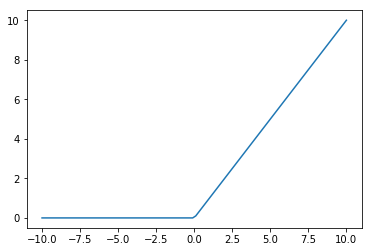

In [76]:
# relu : f(x)=max(0,x)
print(sess.run(tf.nn.relu([-3.,3,10])))
x = np.linspace(-10,10,100)
y = [0 if x1<0 else x1 for x1 in x ]
plt.plot(x,y)
plt.show()

#### relu6 : f(x)=min(max(0,6),x)   
- 使数据位于0~6之间

[0. 3. 6.]


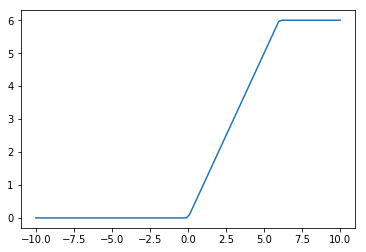

In [78]:
# relu6 : f(x)=min(max(0,6),x) 将数据位于0~6之间
print(sess.run(tf.nn.relu6([-3.,3.,10])))
y = tf.nn.relu6(x)
plt.plot(x,sess.run(y))
plt.show()

#### sigmoid():    f(x) = 1/(1+exp(-x))        
- 通过sigmoid函数计算的函数值在0~1之间

[0.26894143 0.5        0.7310586 ]


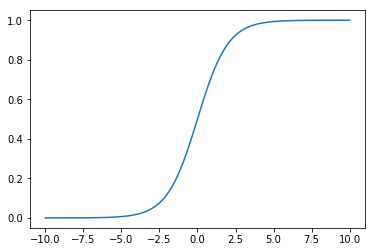

In [82]:
# sigmoid():1/(1+exp(-x))   通过sigmoid函数计算的函数值在0~1之间
print(sess.run(tf.nn.sigmoid([-1.,0.,1.])))
y = tf.nn.sigmoid(x)
plt.plot(x,sess.run(y))
plt.show()

#### tanh():  f(x) = (exp(x)-exp(-x))/(exp(x)+exp(-x))    
- tanh函数的值在-1~1之间

[-0.7615942  0.         0.7615942]


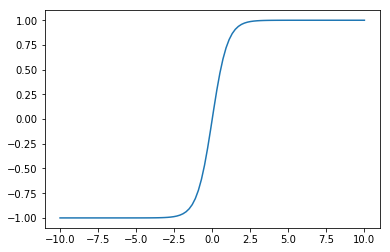

In [96]:
# tanh():(exp(x)-exp(-x))/(exp(x)+exp(-x))   tanh函数的值在-1~1之间
print(sess.run(tf.nn.tanh([-1.,0.,1.])))
y = tf.nn.tanh(x)
plt.plot(x,sess.run(y))
plt.show()

#### softsigh():  softsign(a)=a/(1+|a|)   

[-0.5  0.   0.5]


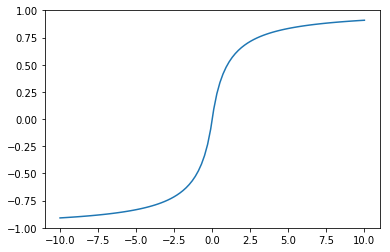

In [95]:
# softsigh(): softsign(a)=a/(1+|a|)   
print(sess.run(tf.nn.softsign([-1.,0.,1.])))
y = tf.nn.softsign(x)
plt.plot(x,sess.run(y))
plt.show()

#### softplus(): f(x)=ln(1+exp(x))  

[0.31326166 0.6931472  1.3132616 ]


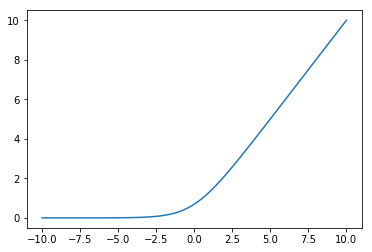

In [90]:
# softplus(): f(x)=ln(1+exp(x))  
print(sess.run(tf.nn.softplus([-1.,0.,1])))
y =tf.nn.softplus(x)
plt.plot(x,sess.run(y))
plt.show()

#### elu():f(x)=a(exp(x)−1) if(x<0)  x if(0≤x)   

[-0.63212055  0.          1.        ]


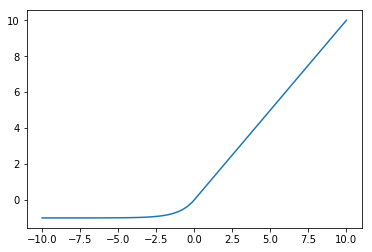

In [93]:
# elu():f(x)=a(exp(x)−1) if(x<0)  x if(0≤x)   
print(sess.run(tf.nn.elu([-1.,0.,1.])))
y = tf.nn.elu(x)
plt.plot(x,sess.run(y))
plt.show()

## 7、损失函数（loss）  
- 拟合问题  
  -- 欧式距离  
  -- 曼哈顿距离
- 分类问题  
  -- 交叉熵

###  ● L2 norm loss (欧式距离）

In [139]:
x_vals = tf.linspace(-1.,1.,10)
target = tf.constant(0.)
l2_y_vals = tf.square(target - x_vals)
l2_y_out = sess.run(l2_y_vals)
print(l2_out)

[1.         0.60493827 0.308642   0.1111111  0.01234568 0.01234569
 0.11111113 0.308642   0.60493827 1.        ]


### ● L1 norm loss (曼哈顿距离）

In [109]:
l1_y_vals = tf.abs(target - x_vals)
l1_y_out = sess.run(l1_y_vals)
print(l1_y_out)

[1.         0.7777778  0.5555556  0.3333333  0.1111111  0.11111116
 0.33333337 0.5555556  0.7777778  1.        ]


### ● Pseudo-Huber loss  

 - 一个连续光滑逼近的胡贝尔损失函数

 - Huber Loss经常用于回归问题，相比与l2 loss,其对离群点（outliers)没有那么敏感

In [114]:
delta1 = tf.constant(0.25)     # 参数1
phuber1_y_vals = tf.multiply(tf.square(delta1),tf.sqrt(1.+tf.square((target - x_vals)/delta1))-1.)
phuber1_y_out = sess.run(phuber1_y_vals)
delta2 = tf.constant(5.)   #参数2
phuber2_y_vals = tf.multiply(tf.square(delta2), tf.sqrt(1. + tf.square((target - x_vals)/delta2)) - 1.)
phuber2_y_out = sess.run(phuber2_y_vals)
print(phuber1_y_out)
print(phuber2_y_out)

[0.1951941  0.14174223 0.08980358 0.04166666 0.00589484 0.00589485
 0.04166667 0.08980358 0.14174224 0.1951941 ]
[0.49509406 0.30066073 0.15384853 0.0554949  0.00617206 0.00617206
 0.0554949  0.15384853 0.30066073 0.49509704]


### ● Hinge loss (合页损失)

- 主要用于支持向量机，但也可以用于神经网络。  
- 它的目的是计算两个目标类之间的损失，1和- 1

In [128]:
x_vals = tf.linspace(-3., 5., 10)
target = tf.constant(1.)
targets = tf.fill([10,], 1.)
hinge_y_vals = tf.maximum(0., 1. - tf.multiply(target, x_vals))
hinge_y_out = sess.run(hinge_y_vals)
print(hinge_y_out)

[4.         3.1111112  2.2222223  1.3333333  0.44444442 0.
 0.         0.         0.         0.        ]


###  ● Cross-entropy loss(交叉熵损失/逻辑损失函数)

- 用于测量实际类（0或1）到预测值之间的距离，这个值通常是在0到1之间的实数

In [129]:
xentropy_y_vals = - tf.multiply(target, tf.log(x_vals)) - tf.multiply((1. - target), tf.log(1. - x_vals))
xentropy_y_out = sess.run(xentropy_y_vals)
print(xentropy_y_out)

[      nan       nan       nan       nan 0.5877866       nan       nan
       nan       nan       nan]


### ● Sigmoid cross entropy loss

 - 与上面损失函数类似，只是使用了sigmoid函数

In [130]:
xentropy_sigmoid_y_vals = tf.nn.sigmoid_cross_entropy_with_logits(labels = x_vals,logits = targets)
xentropy_sigmoid_y_out = sess.run(xentropy_sigmoid_y_vals)
print(xentropy_sigmoid_y_out)

[ 4.3132615   3.424373    2.535484    1.646595    0.75770617 -0.13118294
 -1.0200717  -1.9089606  -2.7978494  -3.6867383 ]


###  ● Weighted cross entropy loss

- 加权版本的 sigmoid cross entropy loss

In [131]:
weight = tf.constant(0.5)
xentropy_weighted_y_vals = tf.nn.weighted_cross_entropy_with_logits(x_vals, targets, weight)
xentropy_weighted_y_out = sess.run(xentropy_weighted_y_vals)
print(xentropy_weighted_y_out)

[ 4.7831545   3.755038    2.7269218   1.6988052   0.670689   -0.35742754
 -1.3855438  -2.41366    -3.4417763  -4.4698925 ]


### ● Softmax cross-entropy loss

 - 用来测量损失时，只有一个目标类别，而不是多个。
 - 通过softmax函数的概率分布，计算损失函数一个真实的概率分布
 - 应用与多分类问题

In [133]:
unscaled_logits = tf.constant([[1., -3., 10.]])
target_dist = tf.constant([[0.1, 0.02, 0.88]])
softmax_xentropy = tf.nn.softmax_cross_entropy_with_logits(labels = unscaled_logits,logits = target_dist)
print(sess.run(softmax_xentropy))

[3.2568445]


### ● Sparse softmax cross-entropy loss

 - softmax 的两分类形式

In [136]:
unscaled_logits = tf.constant([[1., -3., 10.]])
sparse_target_dist = tf.constant([2])
sparse_xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels = sparse_target_dist, logits = unscaled_logits)
print(sess.run(sparse_xentropy))

[0.00012564]


### 绘制图像

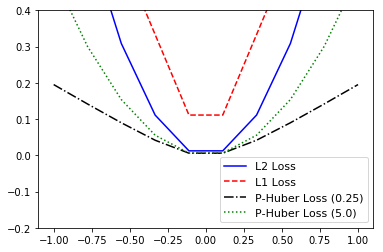

In [140]:
x_array = sess.run(x_vals)
plt.plot(x_array, l2_y_out, 'b-', label='L2 Loss')
plt.plot(x_array, l1_y_out, 'r--', label='L1 Loss')
plt.plot(x_array, phuber1_y_out, 'k-.', label='P-Huber Loss (0.25)')
plt.plot(x_array, phuber2_y_out, 'g:', label='P-Huber Loss (5.0)')
plt.ylim(-0.2, 0.4)
plt.legend(loc='lower right', prop={'size': 11})
plt.show()


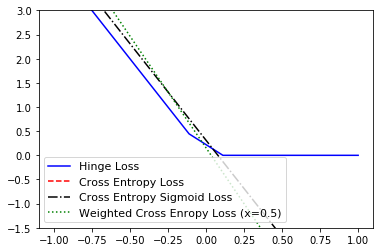

In [143]:
x_array = sess.run(x_vals)
plt.plot(x_array, hinge_y_out, 'b-', label='Hinge Loss')
plt.plot(x_array, xentropy_y_out, 'r--', label='Cross Entropy Loss')
plt.plot(x_array, xentropy_sigmoid_y_out, 'k-.', label='Cross Entropy Sigmoid Loss')
plt.plot(x_array, xentropy_weighted_y_out, 'g:', label='Weighted Cross Enropy Loss (x=0.5)')
plt.ylim(-1.5, 3)
plt.legend(loc='lower left', prop={'size': 11})
plt.show()

# 二、tensorflow 进阶